![image](images/title.jpg)

![image](images/members.png)

|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>20120041<center>  | <center>Trần Kim Bảo<center> |
| <center>20120053<center>  |   <center>Nguyễn Thành Đạt<center>   |
| <center>20120056<center>  |<center>Trần Quốc Đỉnh<center> |
| <center>20120060<center>  | <center>Nguyễn Trí Đức<center> |

![images](images/topic.png)

### Tại sao lại chọn đề tài phân loại dữ liệu `Sentiment Analysis`?
- Với các lý do sau:
    - Tính ứng dụng cao: Phân loại dữ liệu là một trong những lĩnh vực có tính ứng dụng cao nhất trong khoa học máy tính và trí tuệ nhân tạo. Nó có thể được áp dụng trong nhiều lĩnh vực khác nhau như thương mại điện tử, y tế, tài chính, và quản lý tri thức. Giúp các nhà đầu tư và các chuyên gia tài chính đánh giá được tình hình thị trường và dự đoán xu hướng giá cả. Điều này có thể giúp họ đưa ra quyết định đúng đắn về đầu tư và các hoạt động kinh doanh. Hay giúp các doanh nghiệp và tổ chức hiểu rõ hơn về cách người dùng phản hồi đối với sản phẩm, dịch vụ hoặc sự kiện của họ. Điều này có thể giúp họ cải thiện sản phẩm hoặc dịch vụ của mình để đáp ứng nhu cầu của khách hàng.
    - Độ phức tạp tính toán thấp: Phân loại dữ liệu thường có độ phức tạp tính toán thấp hơn so với các lĩnh vực khác của trí tuệ nhân tạo như dự báo chuỗi thời gian hoặc mạng nơ-ron sâu. Điều này có nghĩa là phân loại dữ liệu có thể được thực hiện trên các máy tính có hiệu suất trung bình.
    - Dữ liệu phong phú: Có rất nhiều loại dữ liệu khác nhau có thể được sử dụng để phân loại dữ liệu, từ dữ liệu văn bản đến hình ảnh và âm thanh. Điều này có nghĩa là phân loại dữ liệu có thể được áp dụng cho nhiều loại dữ liệu khác nhau.

### Tại sao lại chọn bộ dữ liệu này?
- Nhóm quyết định sử dụng dataset trên, vì:
    - Số lượng tweet lớn: Twitter là mạng xã hội lớn và phổ biến trên toàn cầu, với hàng triệu tweet được đăng tải hàng ngày. Điều này cung cấp một nguồn dữ liệu lớn để xây dựng mô hình phân loại nội dung.
    - Tính đa dạng của nội dung: Trên Twitter, người dùng có thể chia sẻ mọi loại thông tin, từ tin tức, giải trí đến ý kiến cá nhân và cảm xúc. Do đó, tweet cung cấp một mẫu đa dạng của các loại nội dung phân loại cảm xúc.
    - Tính ngắn gọn: Tweet có giới hạn ký tự 280, điều này yêu cầu người dùng phải tóm tắt ý kiến hoặc cảm xúc của họ trong một khoảng thời gian ngắn. Điều này làm cho tweet rất thú vị để phân tích, vì chúng ta cần đánh giá các từ và cụm từ để hiểu ý nghĩa của tweet.
    - Tính thời sự: Twitter cung cấp một phương tiện để người dùng chia sẻ ý kiến và cảm xúc về các sự kiện thời sự đang diễn ra. Điều này cung cấp một cơ hội để xây dựng các mô hình phân loại nội dung về các sự kiện thời sự để theo dõi ý kiến của người dùng.

### Nguồn gốc và giấy phép sử dụng của bộ dữ liệu?
- Nhóm sử dụng dữ liệu [**Twitter Tweets Sentiment Dataset**](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset)
- LICENSE của dữ liệu là [**CC0: Public Domain**](https://creativecommons.org/publicdomain/zero/1.0/) - người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu.
- Nguồn [**Google**](https://www.google.com/) với mục đích nghiên cứu.

### Tải thư viện

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers pandas numpy
!pip install datasets
!pip install transformers[torch]
!pip install accelerate -U

Looking in indexes: https://download.pytorch.org/whl/cu118
zsh:1: no matches found: transformers[torch]


![image](images/preprocessing.png)

### Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()
pd.set_option("display.max_colwidth", 250)

import string
from nltk.tokenize import TweetTokenizer

c:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <font color=#0404B4>1. Đọc dữ liệu</font>

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")
# %cd /content/drive/MyDrive/Kaggle/Datasets

In [5]:
df = pd.read_csv('../Dataset/Tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative


## <font color=#0404B4>2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?</font>

-  Mỗi dòng là thông tin về bài đăng trên Tweet của mạng xã hội Twitter gồm: id, nội dung, nội dung rút gọn và phân loại nội dung đó.<br><br>

## <font color=#0404B4>3. Có dữ liệu bị trùng lặp ở các dataframe hay không?</font>

In [6]:
def check_duplicated(dataframe):
    duplicated_rows = dataframe.duplicated()

    # In các hàng bị lặp lại
    if len(dataframe[duplicated_rows])>0:
        print('Có dòng dữ liệu bị lặp')
        display(dataframe[duplicated_rows])
    else:
        print('Không có dòng dữ liệu nào bị lặp')

In [7]:
check_duplicated(df)

Không có dòng dữ liệu nào bị lặp


## <font color=#0404B4>4. Mỗi cột có ý nghĩa gì?</font>

|STT|Tên cột dữ liệu | <center>Mô tả<center> | Đơn vị |
|--|:------:| ---| --- |
|1|textID|<center>Mã định danh<center>|
|2|text| <center>Nội dung<center>|
|3|selected_text|<center>Nội dung chắt lọc<center>|
|4|sentiment| <center>Phân loại nội dung<center>||

## <font color=#0404B4>5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp?</font>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


Ta thấy có xuất hiện 1 tweet chưa nội dung trống, thực hiện chuyển giá trị `Nan` thành khoảng `None` để phù hợp với kiểu dữ liệu dạng chuỗi

In [9]:
df.text.fillna("",inplace=True)

In [10]:
df.selected_text.fillna("",inplace=True)

## <font color=#0404B4>6. Có cột nào cần tiền xử lý hay không?</font>

Thực hiện ghép nội dung cột `selected_text` vào cột `text`

In [11]:
df.text=df.loc[:,'text'] + " " + df.loc[:,'selected_text']

Giữ lại 2 thuộc tính dữ liệu: `text`, `sentiment` để thực hiện tiền xử lý và chuẩn bị cho mô hình

In [12]:
df=df[['text','sentiment']]

In [13]:
tokenizer_tweet=TweetTokenizer(strip_handles=True, reduce_len=True)

def cleanData(text):
  scripts_remove=["http\S+",        # Xóa địa chỉ web
                  "[^\x00-\x7F]_?", # Ký tự không thể decode về utf-8
                  "@\w+",           # Xóa các mention
                  "#\w+"]           # Xóa các topic

  # Thực hiện các thao tác trong scripts_remove
  for script in scripts_remove:
    text = re.sub(script, "", text)

  #  Xóa các khoảng trắng bị thừa
  text = re.sub("\s+", " ", text)

  # Loại bỏ ký tự trắng bị thừa ở trước và sau
  text = text.strip()
  return text

def remove_special_characters(text):
    # Xóa các dấu nối câu
    tweet_tokens=tokenizer_tweet.tokenize(text)
    text_clean_stop_words=[]
    for word in tweet_tokens:
      if word not in string.punctuation:
          text_clean_stop_words.append(word)
    return " ".join(text_clean_stop_words)

In [14]:
df["text"]=df.text.apply(cleanData)

In [15]:
df_nomalize_data=df.__deepcopy__()

In [16]:
df_nomalize_data["text"]=df_nomalize_data.text.apply(remove_special_characters)

![image](images/basic_EDA.png)

### Import thư viện

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


- Tính điểm phân tích cảm xúc dựa trên công cụ SentimentIntensityAnalyzer được cung cấp bởi thư viện Natural Language Toolkit (NLTK)
- Tạo 2 DataFrame: 1 DataFrame phân tích cảm xúc của thuộc tính `text` không thực hiện xóa các ký tự đặc biệt và có thực hiện xóa các ký tự đặc biệt.

In [18]:
res={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row["text"]
    res[i] = sia.polarity_scores(text)
res_nomalize={}
for i, row in tqdm(df_nomalize_data.iterrows(), total = len(df_nomalize_data)):
    text = row["text"]
    res_nomalize[i] = sia.polarity_scores(text)

  0%|          | 0/27481 [00:00<?, ?it/s]

  0%|          | 0/27481 [00:00<?, ?it/s]

In [19]:
vaders = pd.DataFrame(res).T
vaders_nomalize=pd.DataFrame(res_nomalize).T
display(vaders.head())
display(vaders_nomalize.head())


,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.559,0.441,0.0,-0.8791
2,0.609,0.391,0.0,-0.8316
3,0.626,0.374,0.0,-0.5707
4,0.000,1.000,0.0,0.0000


,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.537,0.463,0.0,-0.8506
2,0.565,0.435,0.0,-0.8316
3,0.615,0.385,0.0,-0.5267
4,0.000,1.000,0.0,0.0000


In [20]:
vaders = vaders.merge(df, on=vaders.index, how="left")
vaders.drop(columns={"key_0"}, axis=1, inplace=True )

vaders_nomalize = vaders_nomalize.merge(df_nomalize_data, on=vaders_nomalize.index, how="left")
vaders_nomalize.drop(columns={"key_0"}, axis=1, inplace=True )

display(vaders.head())
display(vaders_nomalize.head())

,neg,neu,pos,compound,text,sentiment
0,0.000,1.000,0.0,0.0000,"I`d have responded, if I were going I`d have responded, if I were going",neutral
1,0.559,0.441,0.0,-0.8791,Sooo SAD I will miss you here in San Diego!!! Sooo SAD,negative
2,0.609,0.391,0.0,-0.8316,my boss is bullying me... bullying me,negative
3,0.626,0.374,0.0,-0.5707,what interview! leave me alone leave me alone,negative
4,0.000,1.000,0.0,0.0000,"Sons of ****, why couldn`t they put them on the releases we already bought Sons of ****,",negative


,neg,neu,pos,compound,text,sentiment
0,0.000,1.000,0.0,0.0000,I d have responded if I were going I d have responded if I were going,neutral
1,0.537,0.463,0.0,-0.8506,Sooo SAD I will miss you here in San Diego Sooo SAD,negative
2,0.565,0.435,0.0,-0.8316,my boss is bullying me ... bullying me,negative
3,0.615,0.385,0.0,-0.5267,what interview leave me alone leave me alone,negative
4,0.000,1.000,0.0,0.0000,Sons of why couldn t they put them on the releases we already bought Sons of,negative


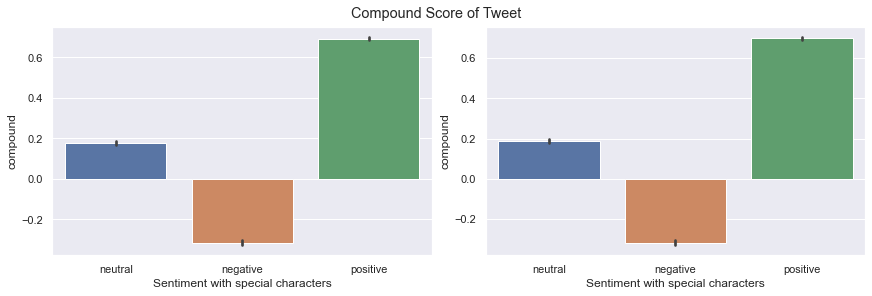

In [21]:
fig, axs = plt.subplots(1,2, figsize=(12,4), constrained_layout=True)
sns.barplot(data=vaders, x="sentiment", y="compound",ax=axs[0])
axs[0].set_xlabel("Sentiment with special characters")

sns.barplot(data=vaders_nomalize, x="sentiment", y="compound",ax=axs[1])
axs[1].set_xlabel("Sentiment with special characters")

plt.suptitle("Compound Score of Tweet")
plt.show()

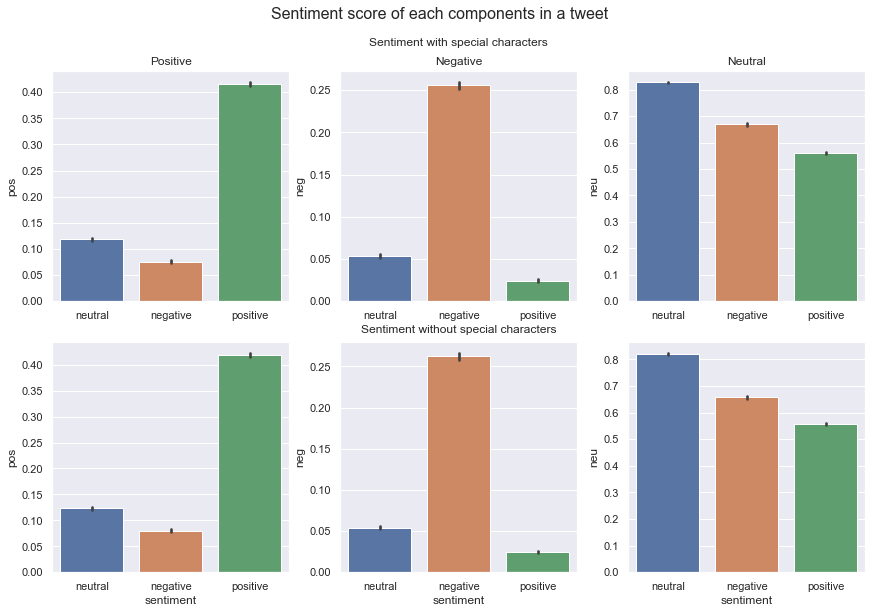

In [22]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

sns.barplot(data=vaders, x="sentiment", y="pos", ax=axs[0][0]).set(xlabel=None)
sns.barplot(data=vaders, x="sentiment", y="neg", ax=axs[0][1]).set(xlabel=None)
sns.barplot(data=vaders, x="sentiment", y="neu", ax=axs[0][2]).set(xlabel=None)

sns.barplot(data=vaders_nomalize, x="sentiment", y="pos", ax=axs[1][0])
sns.barplot(data=vaders_nomalize, x="sentiment", y="neg", ax=axs[1][1])
sns.barplot(data=vaders_nomalize, x="sentiment", y="neu", ax=axs[1][2])

axs[0][0].set_title('Positive')
axs[0][1].set_title('Negative')
axs[0][2].set_title('Neutral')

axs[0][1].text(0.5, 1.12, "Sentiment with special characters", ha='center', va='center', transform=axs[0][1].transAxes)
axs[1][1].text(0.5, 1.05, "Sentiment without special characters", ha='center', va='center', transform=axs[1][1].transAxes)

fig.tight_layout(pad=0.5)
plt.suptitle("Sentiment score of each components in a tweet",y=1.05,fontsize=16)
plt.show()

- Nhận xét:
    - Dựa vào 2 biểu đồ trên ta thấy chênh lệch giữa việc xóa các ký tự đặc biệt không thay đổi quá nhiều điểm số đánh giá cảm xúc văn bản (vẫn có trường hợp mang ý nghĩa nhấn mạnh câu của người dùng).
    - Qua tìm mô hình, với lợi thế của self-attetion vừa tăng độ chính xác lẫn tốc độ:
        - Tự điêù chỉnh các trọng số.
        - Bỏ qua các bước tiền xử lý như: remove stop words với các mô hình học máy khác phải thực hiện.

![image](images/model.png)

### Import thư viện

In [23]:
from datasets import DatasetDict,Dataset

import torch
from torch import nn

import tensorflow as tf

from transformers import Trainer,TrainingArguments
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### <font color=#0404B4>1. Nomalize data</font>

- Nhận xét:
    - Vì các thuật toán học máy thường chỉ có thể làm việc với các giá trị số, chứ không thể làm việc với các giá trị không phải số như chuỗi hoặc các nhãn phân loại. Để giải quyết vấn đề này, chúng ta cần chuyển đổi các giá trị phân loại sang dạng số học (label encoding). Thực hiện chuyển biến phân loại dạng `categorical` thành `numerical` (label encoding).

In [24]:
def to_sentiment(Sentiment):
    if Sentiment == 'neutral':
        return 1
    elif Sentiment == 'positive':
        return 2
    else:
        return 0

In [25]:
df['sentiment']=df.sentiment.apply(to_sentiment)
df.sentiment.value_counts()


1    11118
2     8582
0     7781
Name: sentiment, dtype: int64

### <font color=#0404B4>2. Pre-trained</font>

- Mô hình pre-trained thường được huấn luyện trên các tập dữ liệu lớn và phức tạp, giúp cho việc train mô hình:
    - Tăng độ chính xác: Vì có thể các dữ liệu trong tập train chưa chắc đã có cho mô hình huấn luyện.
    - Tiết kiệm được thời gian: Việc huấn luyện một mô hình từ đầu có thể mất rất nhiều thời gian và tài nguyên.
    - Khả năng tái sử dụng: Các mô hình pre-trained có thể được sử dụng lại trong nhiều tác vụ khác nhau và không cần phải huấn luyện lại từ đầu.

- Pre-trained'distilbert-base-uncased' là một mô hình xử lý ngôn ngữ tự nhiên pre-trained được huấn luyện bởi Hugging Face. DistilBERT là một phiên bản nhỏ hơn và nhanh hơn của BERT, một mô hình học sâu nổi tiếng trong lĩnh vực xử lý ngôn ngữ tự nhiên.

- Mô hình distilbert-base-uncased bao gồm 12 lớp mạng và khoảng 66 triệu tham số. Nó được huấn luyện trên tập dữ liệu lớn và đa dạng, bao gồm tập dữ liệu tiếng Anh của Wikipedia và các tập dữ liệu ngôn ngữ tự nhiên khác.

In [26]:
PRE_TRAINED_MODEL_NAME = 'distilbert-base-uncased'

In [27]:
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

c:\Users\admin\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\admin\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


### <font color=#0404B4>3. Encode and Calculate Sentiment</font>

- Chia tập dữ liệu thành 3 tập nhỏ hơn:
    - Tập train: 70%
    - Tập test: 15%
    - Tập validation: 15%

In [28]:
df_train,df_test=train_test_split(df,test_size=.3,random_state=42)
df_valid,df_test=train_test_split(df_test,test_size=.5,random_state=42)

Chuyển các tập dữ liệu trên vào DatasetDict, sử dụng để đưa dữ liệu vào mô hình huấn luyện.

In [29]:
dataset=DatasetDict()
dataset['train']=Dataset.from_pandas(df_train)
dataset['validation']=Dataset.from_pandas(df_valid)
dataset['test']=Dataset.from_pandas(df_test)

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'sentiment', '__index_level_0__'],
        num_rows: 19236
    })
    validation: Dataset({
        features: ['text', 'sentiment', '__index_level_0__'],
        num_rows: 4122
    })
    test: Dataset({
        features: ['text', 'sentiment', '__index_level_0__'],
        num_rows: 4123
    })
})

**Chuẩn hóa dữ liệu cho mô hình**

In [30]:
def tokenize_sentence(dataset):
    return tokenizer(dataset['text'],truncation=True,max_length=160)

In [31]:
tokenized_sentence=dataset.map(tokenize_sentence,batched=True)
tokenized_sentence

DatasetDict({
    train: Dataset({
        features: ['text', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 19236
    })
    validation: Dataset({
        features: ['text', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 4122
    })
    test: Dataset({
        features: ['text', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 4123
    })
})

In [32]:
tokenized_sentence=tokenized_sentence.rename_column('sentiment','labels')

**Tính toán trọng số cho hàm mất mát dữ liệu**

In [33]:
class_weights=(1-(df_train['sentiment'].value_counts().sort_index()/len(df_train))).values
class_weights

array([0.71704096, 0.59726554, 0.68569349])

In [34]:
class_weights=torch.from_numpy(class_weights).float().to('cuda')

**Tính toán mất mát dữ liệu**

In [35]:
class WeightedLossTrainer(Trainer):
    def compute_loss(self,model,inputs,return_outputs=False):


        outputs=model(**inputs)

        logits=outputs.get('logits')

        labels=inputs.get('labels')

        loss_func=nn.CrossEntropyLoss(weight=class_weights)
        loss=loss_func(logits,labels)
        return (loss,outputs) if return_outputs else loss


**Khởi tạo mô hình `pre_trained`**

In [36]:
model = AutoModelForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME,num_labels=3)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.we

**Xây dựng hàm tính toán độ đo `f1`**

In [37]:
def compute_metrics(pred):
    labels=pred.label_ids
    preds=pred.predictions.argmax(-1)
    f1=f1_score(labels,preds,average='weighted')
    return {"f1":f1}

### <font color=#0404B4>4. Train model</font>

**Khởi tạo các tham số để huấn luyện mô hình**

In [38]:
batch_size=64
logging_steps=100
output_dir='../Model_saved'
training_args=TrainingArguments(output_dir=output_dir,
                                num_train_epochs=10,
                                learning_rate=2e-5,
                                per_device_train_batch_size=batch_size,
                                per_device_eval_batch_size=batch_size,
                                weight_decay=0.01,
                                evaluation_strategy='epoch',
                                load_best_model_at_end=True,
                                logging_steps=logging_steps,
                                save_strategy = "epoch")

**Xây dựng mô hình huấn luyện**

In [39]:
trainer=WeightedLossTrainer(model=model,
                            args=training_args,
                            compute_metrics=compute_metrics,
                            train_dataset=tokenized_sentence['train'],
                            eval_dataset=tokenized_sentence['validation'],
                            tokenizer=tokenizer)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1
1,0.279200,0.290219,0.903979
2,0.231600,0.253727,0.917662
3,0.156200,0.273663,0.913420
4,0.110300,0.331571,0.907412
5,0.074400,0.362436,0.904630
6,0.051300,0.417716,0.907589
7,0.041700,0.430052,0.906566
8,0.033400,0.459850,0.903258
9,0.028700,0.467335,0.906840
10,0.019200,0.466173,0.909206


TrainOutput(global_step=3010, training_loss=0.11446973427981633, metrics={'train_runtime': 1346.5655, 'train_samples_per_second': 142.852, 'train_steps_per_second': 2.235, 'total_flos': 3855147404360544.0, 'train_loss': 0.11446973427981633, 'epoch': 10.0})

![image](images/result.png)

In [ ]:
y_test_predict = trainer.predict(tokenized_sentence['test'])
y_test_logits = y_test_predict.predictions
y_test_probabilities = tf.nn.softmax(y_test_logits)
y_test_pred_labels = np.argmax(y_test_probabilities, axis=1)

In [ ]:
target_names = ['negative','neutral','positive']
print(classification_report(df_test['sentiment'], y_test_pred_labels))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1154
           1       0.89      0.95      0.92      1685
           2       0.95      0.90      0.92      1284

    accuracy                           0.91      4123
   macro avg       0.92      0.91      0.91      4123
weighted avg       0.92      0.91      0.91      4123



- Nhận xét:
    - Mô hình có độ chính xác (accuracy) trên tập dữ liệu test là 0.91, có nghĩa là mô hình dự đoán đúng khoảng 91% các trường hợp trong tập dữ liệu test.
    - Trong số ba lớp được dự đoán, lớp 1 (Neutral) có độ recall cao nhất nhưng ngược lại, lại có precision nhỏ nhất, có nghĩa là mô hình đang phân loại nhiều điểm vào lớp đó và có thể gây ra những sai sót trong việc quyết định. Lớp 0 (Negative) có độ recall thấp nhất (0.88), có nghĩa là mô hình dễ nhầm lẫn các trường hợp thuộc lớp này với lớp khác.
    - Từ các giá trị precision, recall và f1-score của mô hình đều khá cao và ở mức tương đương, cho thấy khả năng dự đoán của mô hình đồng đều trên các lớp.

&rarr; Mô hình tốt

Lưu mô hình đã huấn luyện

In [ ]:
trainer.save_model('sentiment_analysis_tweet')